# Displaying point sets (3-D)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import cvxopt
from cvxopt import matrix, printing

In [2]:
def get_translation_matrix(tx: float = 0, ty: float = 0, tz: float = 0) -> np.ndarray:
    """ construct a scaling matrix.
    input
        tx: x-translation (float)
        ty: y-translation (float)
        tz: z-translation (float)
    output
        4x4 rotation matrix  (3-D translation in homogeneous coordinates)
    """

    T = np.array([[1, 0,  0, tx],
                  [0, 1,  0, ty],
                  [0, 0,  1, tz],
                  [0, 0,  0, 1]])
        
    return T


In [3]:
def get_scaling_matrix(sx: float = 1, sy: float = 1, sz: float = 1) -> np.ndarray:
    """ construct a scaling matrix.
    input
        sx: scaling factor for x dimension(float)
        sy: scaling factor for y dimension(float)
        sz: scaling factor for z dimension(float)
    output
        4x4 rotation matrix  (3-D rotation in homogeneous coordinates)
    """

    S = np.array([[sx, 0,   0,  0],
                  [0, sy,   0,  0],
                  [0,  0,  sz,  0],
                  [0,  0,   0,  1]])
        
    return S


In [4]:
def get_rotation_matrix(theta, axis_name = None) -> np.ndarray:
    """ calculate single rotation of $theta$ matrix around x,y or z
        code adapted from: https://programming-surgeon.com/en/euler-angle-python-en/
    input
        theta = rotation angle(degrees)
        axis_name = 'x', 'y' or 'z'
    output
        4x4 rotation matrix
    """

    c = np.cos(theta * np.pi / 180)
    s = np.sin(theta * np.pi / 180)
    if axis_name == 'x':
        rotation_matrix = np.array([[1, 0,  0, 0],
                                    [0, c, -s, 0],
                                    [0, s,  c, 0],
                                    [0, 0,  0, 1]])
    if axis_name == 'y':
        rotation_matrix = np.array([[ c,  0, s, 0],
                                    [ 0,  1, 0, 0],
                                    [-s,  0, c, 0],
                                    [ 0,  0, 0, 1]])
    elif axis_name == 'z':
        rotation_matrix = np.array([[c, -s, 0, 0],
                                    [s,  c, 0, 0],
                                    [0,  0, 1, 0],
                                    [0,  0, 0, 1]])
    elif axis_name == None: 
        rotation_matrix = np.eye(4)    # Identity matrix 
        
    return rotation_matrix
    

In [5]:
def visualize3D(X: np.ndarray, 
                Y: np.ndarray, 
                ax):
    """
    Plots two pointsets using scatter plot. Its goal is to show the
    difference between the original shape and its transformed
    version.

    Parameters
    ----------
    X: numpy.ndarray, shape=(3, N)
        3 x N array containing the (x,y,z) coordinates of the shape 

    Y: numpy.ndarray, shape=(3, N)
        3 x N array containing the (x,y,z) coordinates of the other shape

    Returns
    -------
    Nothing.

    """
    
    plt.cla()
    ax.scatter(X[0, :],  X[1, :], X[2, :], color='blue', label='Original')
    ax.scatter(Y[0, :],  Y[1, :], Y[2, :], color='red', label='Transformed')
    ax.legend(loc='upper left', fontsize='x-large')
    ax.grid(False)
    ax.set_xlabel('x') 
    ax.set_ylabel('y') 
    ax.set_zlabel('z') 
    plt.draw()

In [6]:
def homogeneous2cartesian(X_h: np.ndarray) -> np.ndarray:
    """Converts the coordinates of a set of 3-D points from 
    homogeneous coordinates to Cartesian coordinates. 

    Args:
      X_h: MxN np.ndarray (float) containing N points in homogeneous coords.  
           Each point is a column of the matrix.

    Returns:
      X_c: (M-1)xN np.ndarray (float) in Cartesian coords. 
           Each point is a column of the matrix.
      
    """    

    # Number of rows (dimension of points). 
    nrows = X_h.shape[0]
    
    # Divide each coordinate by the last to convert point set from homogeneous to Cartesian 
    # (using vectorized calculation for speed and concise code)
    X_c = X_h[0:nrows-1,:] / X_h[-1,:]

    return X_c



In [7]:
def cartesian2homogeneous(X_c: np.ndarray) -> np.ndarray:
    """Converts the coordinates of a set of 3-D points from 
    Cartesian coordinates to homogeneous coordinates. 

    Args:
      X_c: M x N np.ndarray (float). It contains N points in M-dimensional space. 
           Each point is a column of the matrix.

    Returns:
      X_h: (M+1) x N np.ndarray (float) in homogeneous coords. It contains N points in (M+1)-dimensional space. 
           Each point is a column of the matrix.
      
    """    

    # Number of columns (number of points in the set). 
    ncols = X_c.shape[1]

    
    
    # Add an extra row of 1s in the matrix. 
    X_h = np.block([[X_c],
                   [ np.ones((1, ncols))]])

    return X_h

In [8]:
# Load points from file
X = np.loadtxt('bunny.txt')
X.shape

(453, 3)

In [9]:
printing.options['dformat'] = '%.2f'
printing.options['width'] = -1
print('X = ')
print(matrix(X[0:5][:]))

X = 
[-0.03  0.13  0.01]
[-0.04  0.13  0.01]
[-0.07  0.14  0.04]
[-0.01  0.13  0.02]
[-0.02  0.13  0.01]



In [54]:
# Transpose matrix so points are columnsin the data matrix 
Xt = 100 * X.transpose()
Xt.shape

(3, 453)

In [55]:
# Print the first few columns of the data matrix 
print('Xt = ')
print(matrix(Xt[:,0:5]))

Xt = 
[-3.12 -4.47 -6.83 -0.60 -1.74]
[12.63 13.12 14.48 13.04 12.76]
[ 0.51  0.57  4.14  1.79  0.53]



In [62]:
# Scaling
S = scaling_matrix(1.5, 1.5, 1.5)
print('\n')
print('Scaling')
print('--------------------------------')
print('S = ')
print(matrix(S))

# Rotation
R = rotation_matrix(30, axis_name = 'x')     # Rotation 
print('\n')
print('Rotation')
print('--------------------------------')
print('R = ')
print(matrix(R))

# Translation
T = translation_matrix(1, 0.0, 0.0)
print('\n')
print('Translation')
print('--------------------------------')
print('T = ')
print(matrix(T))



Scaling
--------------------------------
S = 
[1.50 0.00 0.00 0.00]
[0.00 1.50 0.00 0.00]
[0.00 0.00 1.50 0.00]
[0.00 0.00 0.00 1.00]



Rotation
--------------------------------
R = 
[ 1.00  0.00  0.00  0.00]
[ 0.00  0.87 -0.50  0.00]
[ 0.00  0.50  0.87  0.00]
[ 0.00  0.00  0.00  1.00]



Translation
--------------------------------
T = 
[1.00 0.00 0.00 1.00]
[0.00 1.00 0.00 0.00]
[0.00 0.00 1.00 0.00]
[0.00 0.00 0.00 1.00]



In [63]:
# Convert points to Homogeneous coords before transforming them
Xh = cartesian2homogeneous(Xt)
Xh.shape

(4, 453)

In [76]:
# Apply transformation
Yh = (T @ R @ S) @ Xh
Yh.shape

(4, 453)

In [77]:
# Convert points back to Cartesian coords before plotting
Yt = homogeneous2cartesian(Yh)
Yt.shape

(3, 453)

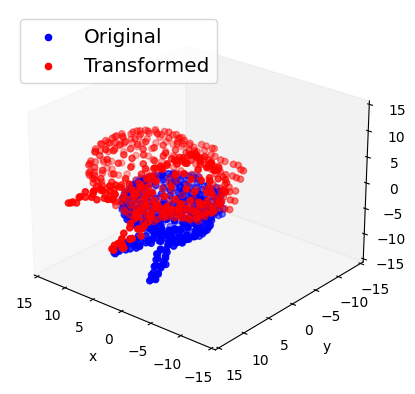

In [78]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
visualize3D(Xt, Yt, ax=ax)
ax.set_xlim(-15, 15)
ax.set_ylim(-15, 15)
ax.set_zlim(-15, 15)
ax.view_init(25, 130, 0) 
plt.show()


NameError: name 'getCoordinateFrameMatrix' is not defined

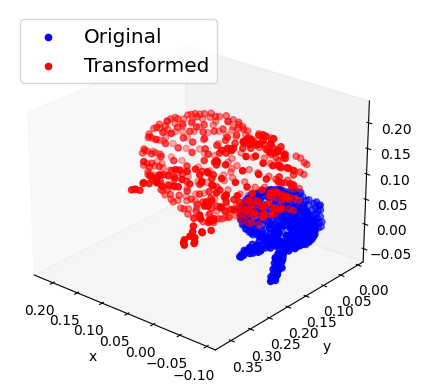

In [40]:
%matplotlib inline
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
visualize3D(Xt, Yt, ax=ax)
ax.view_init(25, 130, 0) 

R_00 = rotation_matrix(0, axis_name = None)   # Rotation matrix
t_00  = np.array([[0],[0],[0]])               # Frame's origin (w.r.t. previous frame), i.e. translation vector

# Matrix of Frame 1 w.r.t. Frame 0 (i.e., the world frame)
T_00 = getCoordinateFrameMatrix(R_00, t_00)

cam2world = T_00


plt.figure(1)

plot_transform(ax=ax, A2B=cam2world)

#ax.set_xlim(-1, 1)
#ax.set_ylim(-1, 1)
#ax.set_zlim(-1, 1)




plt.show()


In [217]:
R_00 = rotation_matrix(0, axis_name = None)   # Rotation matrix
t_00  = np.array([[0],[0],[0]])               # Frame's origin (w.r.t. previous frame), i.e. translation vector

# Matrix of Frame 1 w.r.t. Frame 0 (i.e., the world frame)
T_00 = getCoordinateFrameMatrix(R_00, t_00)

cam2world = T_00

#fig = plt.figure()
#ax = fig.add_subplot(111, projection='3d')

plt.figure(1)

plot_transform(ax=ax, A2B=cam2world)

plt.draw()
plt.show()



<Figure size 640x480 with 0 Axes>

In [104]:
# Convert points to Homogeneous coords before transforming them
Xh = cartesian2homogeneous(Xt)
Xh.shape

(4, 453)

In [105]:
# Get rotation matrix
Ry = RotationAboutY(np.pi/2)
print('Ry = ')
print(matrix(Ry))

Ry = 
[ 0.00  0.00  1.00  0.00]
[ 0.00  1.00  0.00  0.00]
[-1.00  0.00  0.00  0.00]
[ 0.00  0.00  0.00  1.00]



In [106]:
# Transform points
Wh = Ry @ Xh
Wh.shape

(4, 453)

In [107]:
print('Wh = ')
print(matrix(Wh[:,0:5]))

Wh = 
[0.01 0.01 0.04 0.02 0.01]
[0.13 0.13 0.14 0.13 0.13]
[0.03 0.04 0.07 0.01 0.02]
[1.00 1.00 1.00 1.00 1.00]



In [108]:
# Convert points back to Cartesian coords before plotting
Wc = homogeneous2cartesian(Wh)
Wc.shape

(3, 453)

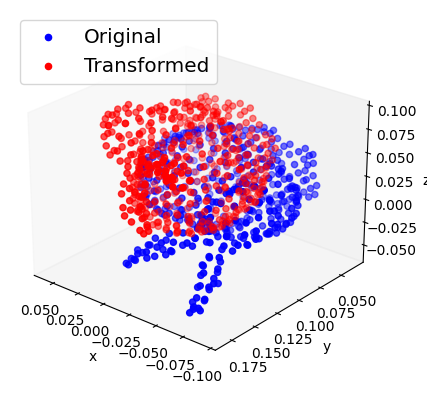

In [109]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
visualize3D(Xt, Wc, ax=ax)
ax.view_init(25, 130, 0) 
plt.show()


In [ ]:
def apply_transformation(X_original, X_transformed): 
    """transforms object using a compound transformation

    Args:
      X_original: 3 x N np.ndarray (float). It contains N points in 3-dimensional space. 
           Each point is a column of the matrix.

    Returns:
      X_transformed: 3 x N np.ndarray (float). It contains N points in 3-dimensional space. 
           Each point is a column of the matrix.
      





    

In [148]:
def getCoordinateFrameMatrix(R_ij, t_ij): 
    """Returns the matrix representing the coordinate frame
    Args:
      R_ij: rotation of Frame j w.r.t. Frame i 
      t_ij: translation of Frame j w.r.t. Frame i 
    Returns:
      T_ij: Matrix of Frame j w.r.t. Frame i. 
      
    """             
    # Rigid-body transformation T = [ R t ]
    T_ij = np.block([[R_ij,                t_ij],
                     [np.zeros((1, 3)),       1]])
    
    return T_ij

In [151]:
# Construct the matrix for Frame 0 (this is the world or global frame)
R_00 = rotation_matrix(0, axis_name = None)   # Rotation matrix
t_00  = np.array([[0],[0],[0]])             # Frame's origin (w.r.t. previous frame), i.e. translation vector

# Matrix of Frame 1 w.r.t. Frame 0 (i.e., the world frame)
T_00 = getCoordinateFrameMatrix(R_00, t_00)

print('\nGlobal frame')
print('--------------------------------')
print('T_00 = ', np.array2string(T_00, prefix='        '))



Global frame
--------------------------------
T_00 =  [[1. 0. 0. 0.]
         [0. 1. 0. 0.]
         [0. 0. 1. 0.]
         [0. 0. 0. 1.]]


In [165]:
cam2world = pt.transform_from_pq([0, 0, 0, np.sqrt(0.5), -np.sqrt(0.5), 0, 0])

NameError: name 'pt' is not defined

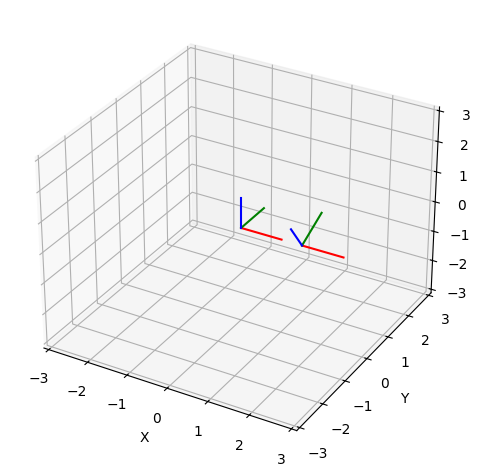

In [187]:
import matplotlib.pyplot as plt
from pytransform3d.transformations import plot_transform
from pytransform3d.plot_utils import make_3d_axis
import pytransform3d.transformations as pt

R_00 = rotation_matrix(0, axis_name = None)   # Rotation matrix
t_00  = np.array([[0],[0],[0]])               # Frame's origin (w.r.t. previous frame), i.e. translation vector

# Matrix of Frame 1 w.r.t. Frame 0 (i.e., the world frame)
T_00 = getCoordinateFrameMatrix(R_00, t_00)

cam2world = T_00

#ax = make_3d_axis(ax_s=1, n_ticks=6)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

plot_transform(ax=ax, A2B=cam2world)

R_01 = rotation_matrix(30, axis_name = 'x')   # Rotation matrix
t_01  = np.array([[1.5],[0],[0]])               # Frame's origin (w.r.t. previous frame), i.e. translation vector

# Matrix of Frame 1 w.r.t. Frame 0 (i.e., the world frame)
T_01 = getCoordinateFrameMatrix(R_01, t_01)

cam2world = T_01

plot_transform(ax=ax, A2B=cam2world)


plt.tight_layout()
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')



ax.set_xlim(-3, 3)
ax.set_ylim(-3, 3)
ax.set_zlim(-3, 3)

plt.show()

In [174]:
cam2world = pt.transform_from_pq([0, 0, 0, np.sqrt(0.5), -np.sqrt(0.5), 0, 0])

In [175]:
print(matrix(cam2world))

[ 1.00 -0.00  0.00  0.00]
[ 0.00 -0.00  1.00  0.00]
[-0.00 -1.00 -0.00  0.00]
[ 0.00  0.00  0.00  1.00]



In [176]:
plot_transform(ax, A2B=cam2world)
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

In [188]:
import numpy as np
import pytransform3d.visualizer as pv


fig = pv.figure()
fig.plot_basis(R=np.eye(3), p=[0.1, 0.2, 0.3])
fig.view_init(azim=15, elev=30)
fig.set_zoom(1.0)
if "__file__" in globals():
    fig.show()
else:
    fig.save_image("__open3d_rendered_image.jpg")

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/pytransform3d/visualizer/__init__.py:15: UserWarning: 3D visualizer is not available. Install open3d.
  warnings.warn("3D visualizer is not available. Install open3d.")


AttributeError: module 'pytransform3d.visualizer' has no attribute 'figure'

In [79]:
pwd

'/Users/eribeiro/Documents/work/automation/testingNotebooks/jupyter-automation-gh-actions'